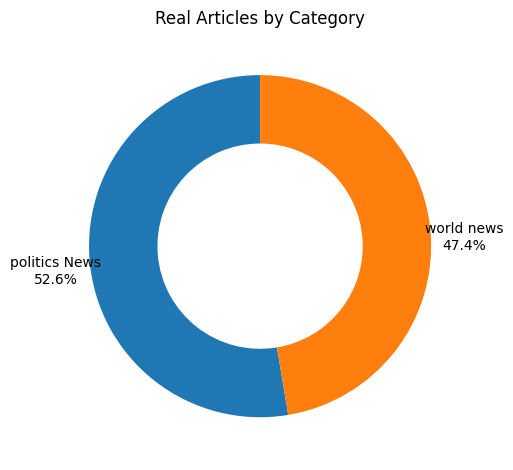

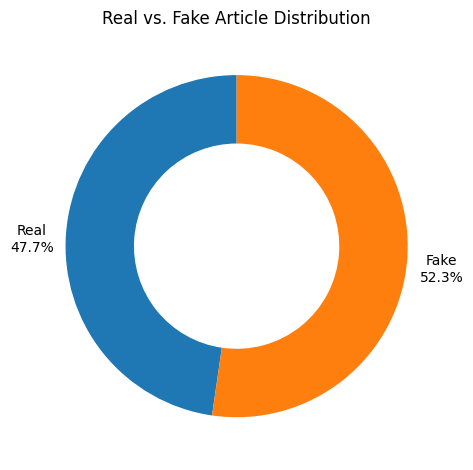

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_donut_with_below_percent(ax, counts, labels, title):
    # draw donut without any labels
    wedges, _ = ax.pie(
        counts,
        labels=None,
        startangle=90,
        wedgeprops=dict(width=0.4)
    )

    total = sum(counts)
    # radius at which to place the category name
    r_label = 1.2
    # vertical shift (in data coords) to push percent below the label
    y_offset = 0.1

    for cnt, label, w in zip(counts, labels, wedges):
        # mid‑angle
        ang = (w.theta1 + w.theta2) / 2.0
        x = np.cos(np.deg2rad(ang)) * r_label
        y = np.sin(np.deg2rad(ang)) * r_label

        # category name
        ax.text(x, y, label, ha='center', va='center')
        # percentage just below
        pct = cnt / total * 100
        ax.text(x, y - y_offset, f"{pct:.1f}%", ha='center', va='center')

    ax.set(aspect="equal", title=title)

# 1) Real articles by category
fig, ax = plt.subplots()
draw_donut_with_below_percent(
    ax,
    counts=[11272, 10145],
    labels=['politics News', 'world news'],
    title='Real Articles by Category'
)
plt.tight_layout()
plt.show()

# 2) Real vs Fake distribution
fig, ax = plt.subplots()
draw_donut_with_below_percent(
    ax,
    counts=[21417, 23481],
    labels=['Real', 'Fake'],
    title='Real vs. Fake Article Distribution'
)
plt.tight_layout()
plt.show()

Train: 17581 real + 20448 fake = 38029 total
Validation: 8730 real + 9750 fake = 18480 total
Test: 4540 real + 4486 fake = 9026 total


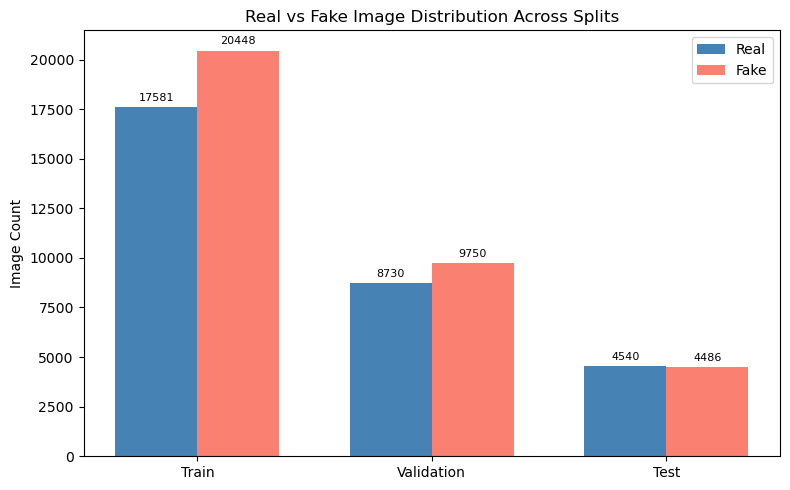

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np

def count_images_local(base_path):
    splits = ['Train', 'Validation', 'Test']
    real_counts = []
    fake_counts = []

    for split in splits:
        real_dir = os.path.join(base_path, split, 'Real')
        fake_dir = os.path.join(base_path, split, 'Fake')

        real_count = len([f for f in os.listdir(real_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        fake_count = len([f for f in os.listdir(fake_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

        real_counts.append(real_count)
        fake_counts.append(fake_count)

        print(f"{split}: {real_count} real + {fake_count} fake = {real_count + fake_count} total")

    # ---- Visualization ----
    x = np.arange(len(splits))  # [0, 1, 2]
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, real_counts, width, label='Real', color='steelblue')
    bars2 = ax.bar(x + width/2, fake_counts, width, label='Fake', color='salmon')

    ax.set_ylabel('Image Count')
    ax.set_title('Real vs Fake Image Distribution Across Splits')
    ax.set_xticks(x)
    ax.set_xticklabels(splits)
    ax.legend()

    # Annotate counts on top of bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.savefig("image_distribution_visual.png")
    plt.show()

# Example usage
downloads_path = os.path.expanduser("~/Desktop/Preprocessed_Deepfake")
count_images_local(downloads_path)
